In [68]:
import warnings

#%pip install jsonlines
#%pip install seaborn
warnings.filterwarnings("ignore")

In [69]:
import jsonlines                        # used to turn the huge glob of data from lab.js into a pandas dataframe
import pandas as pd                     # used to organize the data in columns and rows
import seaborn as sns                   # used to make pretty pictures :-)
from matplotlib import pyplot as plt    # used to touch up the figures that `seaborn`` makes

import pingouin as pg
from scipy import stats
import numpy as np

In [70]:


###########################################################################

def load_and_clean_data(raw_path):
    i = 0
    with jsonlines.open(raw_path) as reader:
        for line in reader:
            if i == 0:
                df = pd.DataFrame(line)
                i += 1
            else:
                df = pd.concat([df, pd.DataFrame(line)])
                i += 1
    df['url'] = df['url'].ffill()
    df['url'] = [int(x['srid']) for x in list(df['url'])]
    df.rename(columns={'url': 'ID'}, inplace=True)
    del df['meta']
    return df

In [71]:
raw1 = '/Users/ethan/Documents/GitHub/ExPsyLing/Experiments/Experiment 2/data/Experiment2_rawdata_2023.txt'
raw2 = '/Users/ethan/Documents/GitHub/ExPsyLing/Experiments/Experiment 2/data/Experiment2_rawdata_2024.txt'
raw3 = '/Users/ethan/Documents/GitHub/ExPsyLing/Experiments/Experiment 2/data/Experiment2_rawdata_2025.txt'

df1 = load_and_clean_data(raw1)
df2 = load_and_clean_data(raw2)
df3 = load_and_clean_data(raw3)

# add column with year information
df1['year'] = 2023
df2['year'] = 2024
df3['year'] = 2025

# concatenate dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

df.head()

,ID,sender,sender_type,sender_id,response,response_action,ended_on,duration,time_run,time_render,...,time_switch,counterbalance,,stim,condition,block,correct_response,correctResponse,correct,year
0,2252,Instructions1,canvas.Screen,0,,keypress,response,4679.644,10931.9,10073.603,...,15646.283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
1,2252,Instructions2,canvas.Screen,1,,keypress,response,5033.217,15641.1,15629.589,...,20685.162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
2,2252,Instructions3,canvas.Screen,2,,keypress,response,3670.538,20681.5,20668.915,...,24372.782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
3,2252,Instructions4,canvas.Screen,3,,keypress,response,5168.818,24356.8,24356.296,...,29567.617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
4,2252,Instructions5,canvas.Screen,4,,keypress,response,3231.283,29543.4,29528.418,...,32815.263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023


In [72]:
# Make a new dataframe with only rows where the "sender" column is "Trial" and the "Block" column is not "practice"
df = df[(df['sender'] == 'Stimulus') & (df['block'] != 'practice')]


In [73]:
# Make a new dataframe with only the columns that we want to keep
df = df[['ID', 'duration', 'correct', 'stim', 'condition', 'year']]
df.head(5)

,ID,duration,correct,stim,condition,year
34,2252,1574.365,True,purse-doctor,Unrelated,2023
38,2252,2074.387,True,barth-groond,Nonword,2023
42,2252,1212.987,True,sing-queen,Unrelated,2023
46,2252,2351.828,True,honip-bee,Filler,2023
50,2252,2351.941,True,capsute-pill,Filler,2023


In [74]:
df.head()

,ID,duration,correct,stim,condition,year
34,2252,1574.365,True,purse-doctor,Unrelated,2023
38,2252,2074.387,True,barth-groond,Nonword,2023
42,2252,1212.987,True,sing-queen,Unrelated,2023
46,2252,2351.828,True,honip-bee,Filler,2023
50,2252,2351.941,True,capsute-pill,Filler,2023


In [75]:
# Make a new dataframe d with only the rows where the "correct" column is "True"
d = df[df['correct'] == True]
d.head()

,ID,duration,correct,stim,condition,year
34,2252,1574.365,True,purse-doctor,Unrelated,2023
38,2252,2074.387,True,barth-groond,Nonword,2023
42,2252,1212.987,True,sing-queen,Unrelated,2023
46,2252,2351.828,True,honip-bee,Filler,2023
50,2252,2351.941,True,capsute-pill,Filler,2023


<Axes: xlabel='condition', ylabel='duration'>

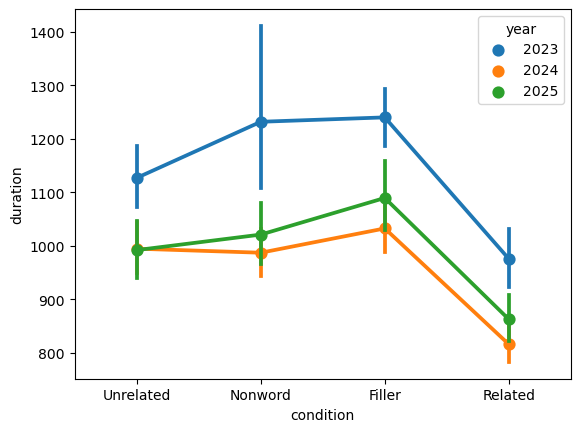

In [76]:
# Plot condition vs duration

sns.pointplot(data = d, x='condition', y='duration', hue='year')

In [77]:

d


,ID,duration,correct,stim,condition,year
34,2252,1574.365,True,purse-doctor,Unrelated,2023
38,2252,2074.387,True,barth-groond,Nonword,2023
42,2252,1212.987,True,sing-queen,Unrelated,2023
46,2252,2351.828,True,honip-bee,Filler,2023
50,2252,2351.941,True,capsute-pill,Filler,2023
...,...,...,...,...,...,...
21473,5936,1916.300,True,nock-kry,Nonword,2025
21477,5936,818.500,True,sconix-marble,Filler,2025
21481,5936,676.400,True,honip-bee,Filler,2025
21485,5936,1277.400,True,tall-short,Related,2025


In [78]:
df_main = d[d['condition'].isin(['Unrelated', 'Related'])]
df_main

,ID,duration,correct,stim,condition,year
34,2252,1574.365,True,purse-doctor,Unrelated,2023
42,2252,1212.987,True,sing-queen,Unrelated,2023
54,2252,1506.511,True,tune-false,Related,2023
62,2252,2402.225,True,carves-round,Unrelated,2023
66,2252,4115.986,True,farmer-nail,Unrelated,2023
...,...,...,...,...,...,...
21453,5936,834.900,True,circle-round,Related,2025
21457,5936,1017.300,True,limp-tiger,Unrelated,2025
21461,5936,677.200,True,wife-death,Unrelated,2025
21469,5936,1045.900,True,spider-web,Related,2025


In [79]:
# get only the rows where year is 2025
df_main = df_main[df_main['year'] == 2025]

In [80]:
df_main

,ID,duration,correct,stim,condition,year
15948,5952,2172.86,True,tune-false,Related,2025
15960,5952,941.66,True,yours-old,Unrelated,2025
15980,5952,788.30,True,hammer-nail,Related,2025
15984,5952,1674.78,True,cost-found,Unrelated,2025
15988,5952,975.32,True,plant-flower,Related,2025
...,...,...,...,...,...,...
21453,5936,834.90,True,circle-round,Related,2025
21457,5936,1017.30,True,limp-tiger,Unrelated,2025
21461,5936,677.20,True,wife-death,Unrelated,2025
21469,5936,1045.90,True,spider-web,Related,2025


In [81]:
# make wide format data with only duration and condition columns
df_wide = df_main.pivot_table(index='ID', columns='condition', values='duration')
df_wide = df_wide.reset_index()
df_wide

condition,ID,Related,Unrelated
0,5936,920.933333,1072.246154
1,5937,665.926316,748.627778
2,5938,748.068421,800.264706
3,5939,766.814286,946.669231
4,5941,704.475000,789.429412
5,5942,949.115000,890.161111
6,5943,635.338000,758.283000
7,5944,684.942105,955.880000
8,5945,938.861905,1010.346667
9,5946,1105.500000,1213.980000


In [82]:
pg.ttest(df_wide['Unrelated'], df_wide['Related'], paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.77125,15,two-sided,0.001849,"[55.49, 199.75]",0.493902,22.591,0.45584


Let's do it by hand!

In [95]:
# add a column for Difference
df_wide['Difference'] = df_wide['Related'] - df_wide['Unrelated']

In [96]:
df_wide

condition,ID,Related,Unrelated,Difference
0,5936,920.933333,1072.246154,-151.312821
1,5937,665.926316,748.627778,-82.701462
2,5938,748.068421,800.264706,-52.196285
3,5939,766.814286,946.669231,-179.854945
4,5941,704.475000,789.429412,-84.954412
5,5942,949.115000,890.161111,58.953889
6,5943,635.338000,758.283000,-122.945000
7,5944,684.942105,955.880000,-270.937895
8,5945,938.861905,1010.346667,-71.484762
9,5946,1105.500000,1213.980000,-108.480000


In [205]:
t = df_wide['Difference'].mean() / (df_wide['Difference'].std() / np.sqrt(len(df_wide['Difference'])))
t

-3.771249612944031

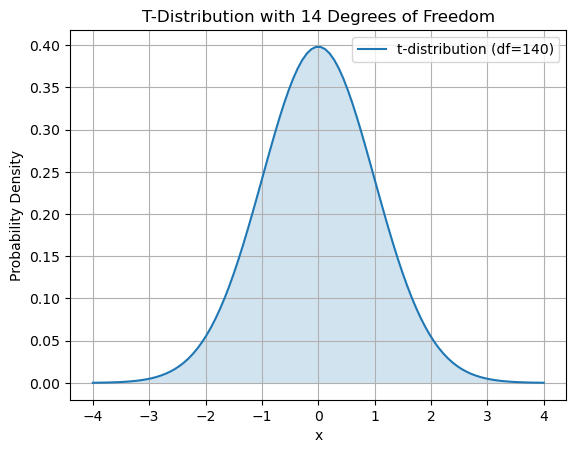

In [ ]:
df = 14

# plot t-distribution with 14 degrees of freedom
x = np.linspace(-4, 4, 100)
y = stats.t.pdf(x, df=df)
plt.plot(x, y, label='t-distribution (df=' + str(df) + ')')
plt.fill_between(x, y, alpha=0.2)
plt.title('T-Distribution with 14 Degrees of Freedom')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

In [228]:
tail = 1-stats.t.cdf(3.771, df=14)
tail
p_value = tail + tail
print(p_value)

0.0020658255019385674


In [229]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


def plot_pairwise_differences(differences, ax=None, figsize=(12, 7), show_plot=True):
    """
    Plot paired difference scores with 95% CI and perform one-sample t-test vs zero.

    Parameters
    ----------
    differences : array-like
        Array of difference scores
    ax : matplotlib.axes.Axes, optional
        Axes object to plot on. If None, creates new figure.
    figsize : tuple, optional
        Figure size if creating new figure (default: (12, 7))
    show_plot : bool, optional
        Whether to call plt.show() (default: True)

    Returns
    -------
    fig : matplotlib.figure.Figure or None
        Figure object (None if ax was provided)
    ax : matplotlib.axes.Axes
        Axes object
    stats_dict : dict
        Dictionary with statistical results
    """
    # Ensure numpy array
    differences = np.asarray(differences)

    # Calculate statistics
    mean_diff = np.mean(differences)
    sem = stats.sem(differences)
    ci_95 = sem * stats.t.ppf(0.975, len(differences) - 1)
    lower_ci = mean_diff - ci_95
    upper_ci = mean_diff + ci_95

    # Perform t-test
    t_stat, p_value = stats.ttest_1samp(differences, 0)

    # Create figure if ax not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
        created_fig = True
    else:
        fig = None
        created_fig = False

    # Add shaded area for 95% CI
    x_positions = np.arange(1, len(differences) + 1)
    ax.axhspan(lower_ci, upper_ci, alpha=0.2, color='blue', 
               label=f'95% CI: [{lower_ci:.2f}, {upper_ci:.2f}]', zorder=1)

    # Plot individual points
    colors = ['red' if d < 0 else 'green' for d in differences]
    ax.scatter(x_positions, differences, s=120, c=colors, alpha=0.7, 
               edgecolors='black', linewidth=1.5, zorder=3)

    # Add stems from zero to each point
    for x, y in zip(x_positions, differences):
        ax.plot([x, x], [0, y], 'k-', alpha=0.3, linewidth=1.5, zorder=2)

    # Add horizontal line at zero
    ax.axhline(y=0, color='black', linestyle='-', linewidth=2.5, 
               label='Zero (No Difference)', zorder=2)

    # Add mean line
    ax.axhline(y=mean_diff, color='blue', linestyle='--', linewidth=2.5, 
               label=f'Mean: {mean_diff:.2f}', zorder=2)

    # Formatting
    ax.set_xlabel('Pair Number', fontsize=11, fontweight='bold')
    ax.set_ylabel('Difference Score', fontsize=11, fontweight='bold')
    ax.set_title(f'Paired Differences (t={t_stat:.3f}, p={p_value:.4f})', 
                 fontsize=12, fontweight='bold', pad=15)
    ax.grid(True, alpha=0.3, axis='y', linestyle='--')
    ax.legend(fontsize=9, loc='lower left', framealpha=0.9)
    ax.set_xticks(x_positions)

    # Add text with n and negative differences
    textstr = f'n = {len(differences)}\nNegative: {sum(d < 0 for d in differences)}/{len(differences)}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    ax.text(0.98, 0.97, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right', bbox=props)

    if created_fig:
        plt.tight_layout()
        if show_plot:
            plt.show()

    stats_dict = {
        'mean_diff': mean_diff,
        'sem': sem,
        'ci_95': ci_95,
        'ci_lower': lower_ci,
        'ci_upper': upper_ci,
        't_stat': t_stat,
        'p_value': p_value,
        'n': len(differences)
    }

    return fig, ax




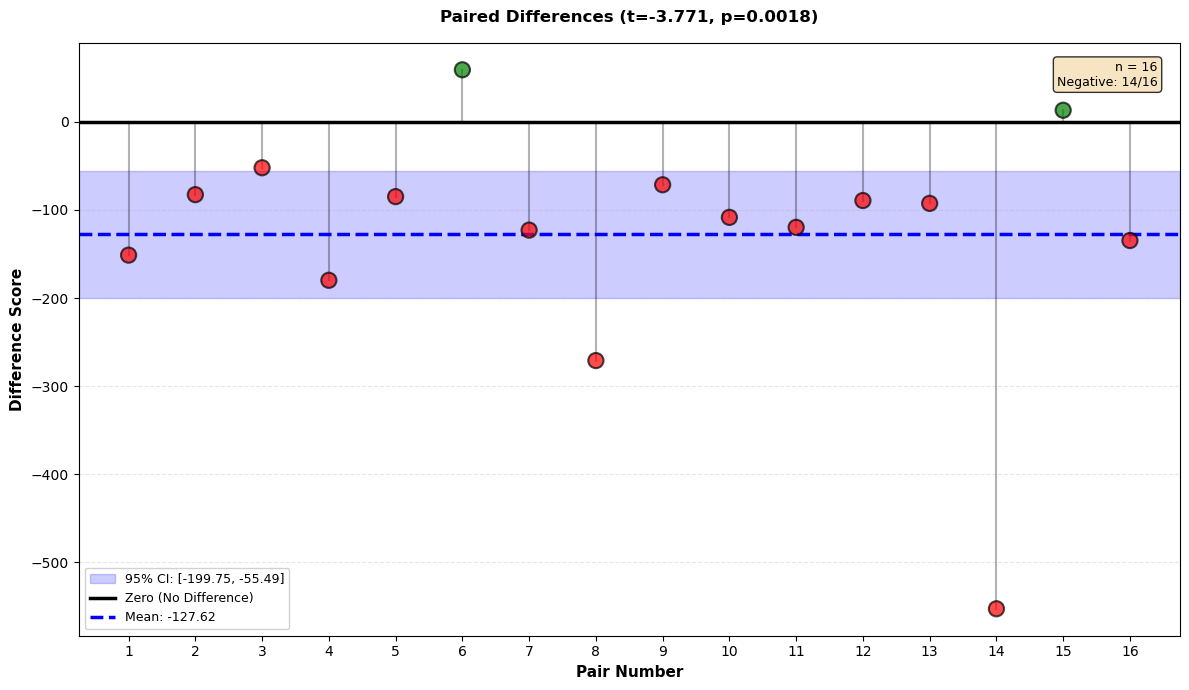

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Paired Differences (t=-3.771, p=0.0018)'}, xlabel='Pair Number', ylabel='Difference Score'>)

In [230]:
differences = df_wide['Difference'].values

plot_pairwise_differences(differences)

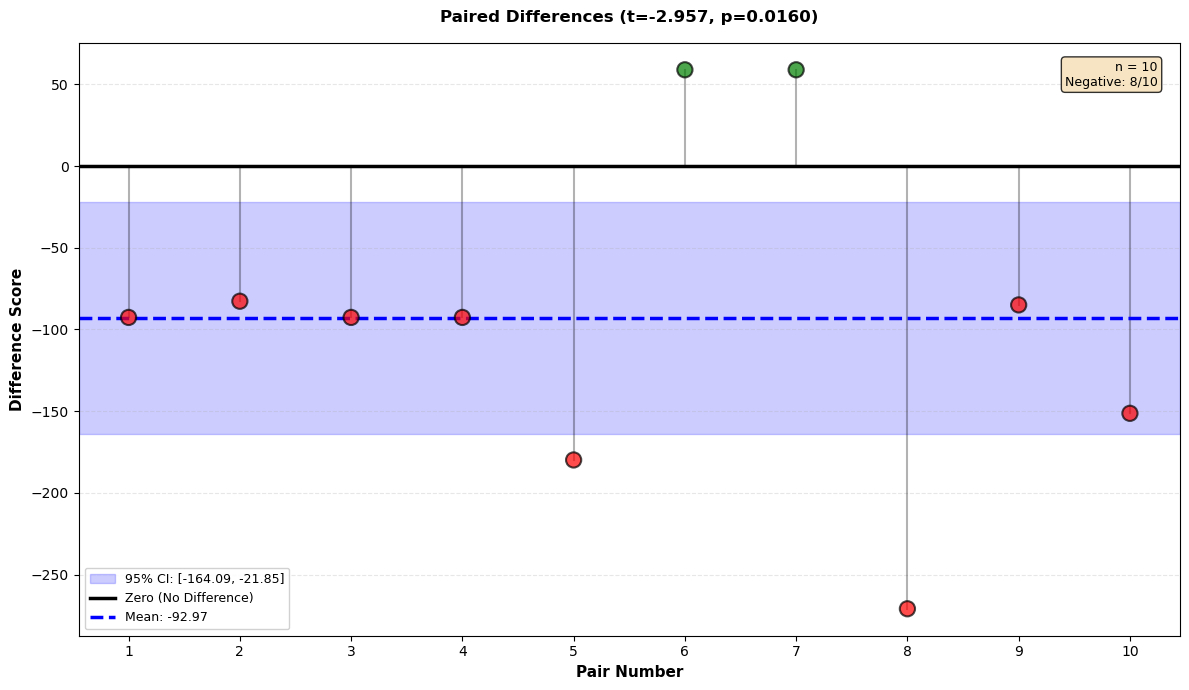

(<Figure size 1200x700 with 1 Axes>,
 <Axes: title={'center': 'Paired Differences (t=-2.957, p=0.0160)'}, xlabel='Pair Number', ylabel='Difference Score'>)

In [231]:
# from the distribution of differences, take a new sample of 5 difference scores
new_sample = np.random.choice(differences, size=10, replace=True)

plot_pairwise_differences(new_sample)

In [176]:

experiments = []
for i in range(5):
    new_sample = np.random.choice(differences, size=10, replace=True)
    experiments.append(new_sample)


In [177]:
experiments

[array([-552.51078945,   58.95388893, -179.85494507, -270.93789473,
          13.06444444, -122.945     , -119.79250002, -119.79250002,
         -84.95441177,  -84.95441177]),
 array([ -89.38092105, -134.73666667,  -92.61529412, -119.79250002,
        -119.79250002,  -71.48476187, -179.85494507, -134.73666667,
        -108.48      ,  -71.48476187]),
 array([-108.48      , -151.31282051,  -82.701462  ,  -82.701462  ,
         -52.19628487,  -92.61529412,  -84.95441177, -134.73666667,
        -134.73666667, -552.51078945]),
 array([ -92.61529412,  -52.19628487,  -84.95441177, -134.73666667,
        -179.85494507,  -84.95441177,  -71.48476187,  -52.19628487,
        -270.93789473, -119.79250002]),
 array([  58.95388893,   13.06444444, -134.73666667,  -82.701462  ,
          13.06444444,  -89.38092105, -108.48      , -151.31282051,
        -151.31282051, -179.85494507])]

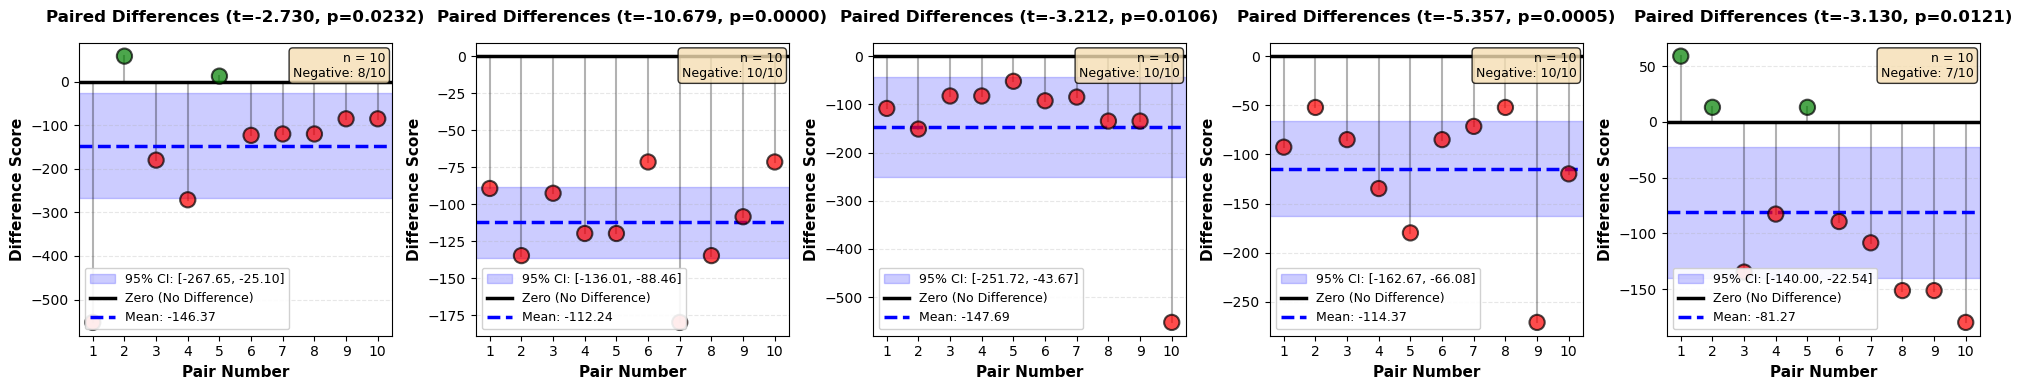

In [178]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
for i, experiment in enumerate(experiments):
    plot_pairwise_differences(experiment, ax=axs[i], show_plot=False)
plt.tight_layout()
plt.show()

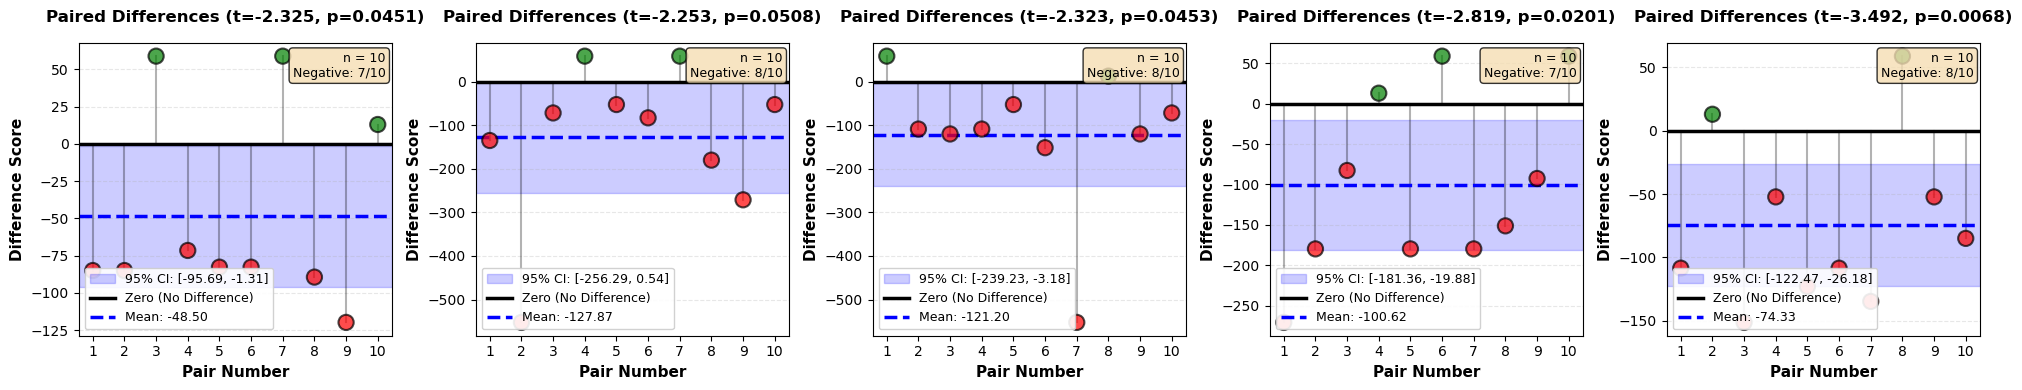

In [184]:
experiments = []
for i in range(5):
    new_sample = np.random.choice(differences, size=10, replace=True)
    experiments.append(new_sample)

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
for i, experiment in enumerate(experiments):
    plot_pairwise_differences(experiment, ax=axs[i], show_plot=False)
plt.tight_layout()
plt.show()